# Proyecto NLP

## 1.Lectura y alistamiento del archivo PQRD

In [4]:
import re
import pandas as pd 
from pprint import pprint

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import pyLDAvis.gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\toshiba\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [58]:
#Leer archivo
data_i = pd.read_excel(r'D:/NLP/ProyectoNLP/pqrd.xlsx')

data_i.head()

,Fecha,Cod_Barras,año,Departamento,ciudad,Unidad_Ejecutora,Solicitud,Descripcion,SolicitudSAC,TipoSolicitudSAC,Tema,SubTema,Asunto,PuntoRadicacion,TipoSolicitante
0,2019-01-01 01:23:49.953,06-01-20190101019286,2019,NaN,NaN,NaN,CONSULTA,Prueba consecutivo,Solicitud SAC,Petición,Informacion general,Solicitud de tramite,NaN,NaN,NaN
1,2019-01-01 16:26:22.000,06-01-20190101000001,2019,Bogotá,Bogotá D.C.,No Aplica,FELICITACIÓN,Prueba validación inicio numeración radicados ...,NaN,NaN,NaN,NaN,Prueba,Web,NaN
2,2019-01-02 09:01:42.877,06-01-20190102000002,2019,NaN,NaN,NaN,PETICIÓN,Bogotá 2 de Enero de 2019. Señores Caja de...,Solicitud SAC,Petición,Informacion general,Prórroga Vivienda - 8,NaN,NaN,NaN
3,2019-01-02 10:06:28.027,06-01-20190102000003,2019,NaN,NaN,NaN,REQUERIMIENTO,"Solicitud aclaración estado cesantias, con el ...",Solicitud SAC,Petición,Actualización,Cuentas Administración de Cesantías,NaN,NaN,NaN
4,2019-01-02 10:39:55.317,06-01-20190102000004,2019,NaN,NaN,NaN,CONSULTA,Buen día un favor si me pueden enviar el estra...,Solicitud SAC,Certificación,Cuenta del afiliado,Estado de Cuenta,NaN,NaN,NaN


In [61]:
#Seleccionar solo columnas de interes
data=data_i.filter(['Fecha', 'año','Solicitud','Descripcion'])
data

,Fecha,año,Solicitud,Descripcion
0,2019-01-01 01:23:49.953,2019,CONSULTA,Prueba consecutivo
1,2019-01-01 16:26:22.000,2019,FELICITACIÓN,Prueba validación inicio numeración radicados ...
2,2019-01-02 09:01:42.877,2019,PETICIÓN,Bogotá 2 de Enero de 2019. Señores Caja de...
3,2019-01-02 10:06:28.027,2019,REQUERIMIENTO,"Solicitud aclaración estado cesantias, con el ..."
4,2019-01-02 10:39:55.317,2019,CONSULTA,Buen día un favor si me pueden enviar el estra...
...,...,...,...,...
47379,2020-11-13 17:16:03.000,2020,PETICIÓN,PETICIÓN
47380,2020-11-13 17:33:54.127,2020,PETICIÓN,Solicitud actualización de mi número de teléfo...
47381,2020-11-13 17:49:40.190,2020,PETICIÓN,Buenas tardes De manera atenta solicito tenga...
47382,2020-11-13 17:57:46.483,2020,PETICIÓN,solicito la oportunidad de poder definir mi si...


In [70]:
#Seleccionar solo 5 categorias

data=data.loc[(data['Solicitud'] == 'QUEJA')]
data

,Fecha,año,Solicitud,Descripcion,NDescripcion,PP
31,2019-01-03 11:17:54.080,2019,QUEJA,buenos dias tengo una queja con el portal tran...,36.0,"[buenos, dias, queja, portal, transaccional, c..."
123,2019-01-04 22:59:47.697,2019,QUEJA,La aplicación de caja honor está trabajando ma...,31.0,"[aplicación, caja, honor, trabajando, mal, ing..."
138,2019-01-08 08:07:38.420,2019,QUEJA,buenas tardes solicito a caja honor que no me ...,54.0,"[buenas, tardes, solicito, caja, honor, sigan,..."
156,2019-01-08 09:43:08.883,2019,QUEJA,COMEDIDAMENTE ME PERMITO SOLICITAR ME SEA VERI...,92.0,"[comedidamente, permito, solicitar, verificada..."
263,2019-01-09 10:57:42.957,2019,QUEJA,respetuosamente me permito dirigirme a ustedes...,82.0,"[respetuosamente, permito, dirigirme, ustedes,..."
...,...,...,...,...,...,...
46492,2020-11-04 12:58:17.887,2020,QUEJA,el 13 de octubre de 2020 radique los documento...,346.0,"[octubre, radique, documentos, primer, pago, v..."
46750,2020-11-06 14:04:44.293,2020,QUEJA,Radique el día 30 de octubre la compraventa pa...,94.0,"[radique, día, octubre, compraventa, solucion,..."
47026,2020-11-10 15:09:14.800,2020,QUEJA,"buena tarde, en conversación vía chat atendido...",204.0,"[buena, tarde, conversación, vía, chat, atendi..."
47028,2020-11-10 15:10:40.997,2020,QUEJA,BUENAS TARDE LA PRESENTE ES PARA DAR MI QU...,60.0,"[buenas, tarde, presente, dar, queja, debido, ..."


In [71]:
#Contar las palabras en la columna Descripcion con el fin de examinar si algunos registros tiene pocas palabras
data['NDescripcion']=data['Descripcion'].str.split(' ').str.len()

In [72]:
#Eliminar filas de la columna NDescripcion que tengan menos de 8 palabras
data = data.drop(data[data['NDescripcion']<10].index)

In [73]:
len(data.index)

378

In [47]:
type(data)

pandas.core.frame.DataFrame

## 2.Pre-procesamiento

In [74]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

In [75]:
def pre_procesado(texto):
    texto = str(texto) 
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords_sp]
    return texto

In [76]:
data['PP'] = data['Descripcion'].apply(lambda texto: pre_procesado(texto))

data.head()

,Fecha,año,Solicitud,Descripcion,NDescripcion,PP
31,2019-01-03 11:17:54.080,2019,QUEJA,buenos dias tengo una queja con el portal tran...,36.0,"[buenos, dias, queja, portal, transaccional, c..."
123,2019-01-04 22:59:47.697,2019,QUEJA,La aplicación de caja honor está trabajando ma...,31.0,"[aplicación, caja, honor, trabajando, mal, ing..."
138,2019-01-08 08:07:38.420,2019,QUEJA,buenas tardes solicito a caja honor que no me ...,54.0,"[buenas, tardes, solicito, caja, honor, sigan,..."
156,2019-01-08 09:43:08.883,2019,QUEJA,COMEDIDAMENTE ME PERMITO SOLICITAR ME SEA VERI...,92.0,"[comedidamente, permito, solicitar, verificada..."
263,2019-01-09 10:57:42.957,2019,QUEJA,respetuosamente me permito dirigirme a ustedes...,82.0,"[respetuosamente, permito, dirigirme, ustedes,..."


In [19]:
# Exportar el archivo con los filtros realizados
#data.to_excel(r'C:\Users\toshiba\Documents\NLP.xls')

# Entrenar el modelo

In [77]:
import pyLDAvis.gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from pprint import pprint

In [84]:
# Crear una representación de los documentos en forma de diccionario
dictionary = Dictionary(data['PP'].values)

# Filtrar palabras muy frecuentes o infrecuentes

dictionary.filter_extremes(no_below=5, no_above=0.5)
 
corpus = [dictionary.doc2bow(text) for text in data['PP'].values]

#Train the topic model

model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, passes=200)

#dictionary = Dictionary(data['PP'].values)

# 4: Resultados

In [85]:


model.print_topics(num_words=10)

[(0,
  '0.026*"vivienda" + 0.016*"día" + 0.016*"radicado" + 0.015*"tramite" + 0.015*"proceso" + 0.014*"caja" + 0.014*"documentos" + 0.012*"honor" + 0.012*"documentación" + 0.011*"escritura"'),
 (1,
  '0.031*"respuesta" + 0.030*"caja" + 0.026*"honor" + 0.017*"fecha" + 0.017*"queja" + 0.017*"radicado" + 0.017*"recurso" + 0.014*"solicitud" + 0.014*"día" + 0.010*"vivienda"'),
 (2,
  '0.017*"caja" + 0.016*"honor" + 0.015*"gracias" + 0.013*"portal" + 0.013*"solicito" + 0.013*"ingresar" + 0.013*"días" + 0.013*"respuesta" + 0.012*"buenos" + 0.011*"cuenta"'),
 (3,
  '0.027*"caja" + 0.022*"honor" + 0.020*"q" + 0.018*"cuenta" + 0.013*"pago" + 0.013*"correo" + 0.012*"ustedes" + 0.012*"vivienda" + 0.012*"entidad" + 0.010*"tramite"')]

In [86]:
lda_display = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=True)

pyLDAvis.display(lda_display)

In [90]:
d = dictionary.doc2bow(["vivienda", "queja", "portal", "transaccional"])

topics = model.get_document_topics(d)

topics

[(0, 0.05952804), (1, 0.055057913), (2, 0.83198047), (3, 0.05343363)]

In [91]:
def get_doc_top_n(text_processed, n):

    d = dictionary.doc2bow(text_processed)

    topics = dict(model.get_document_topics(d))

    try:

        return topic[n]

    except:

        return None

In [94]:
for t in range(0,3):

     top_name = f"topic_{t}"

     data[top_name] = data['PP'].apply(lambda doc: get_doc_top_n(doc,t))

In [97]:
#tema mas representativos de cada grupo
for t in range(0,4):

     print(f" TOPIC {t}")

     for i,row in enumerate(data.sort_values(f"topic_{t}", ascending=False)['Descripcion'].head()):

         print(f"Descripcion #{i+1}")

         print(row[:200])

         print()

     print()

 TOPIC 0
Descripcion #1
buenos dias tengo una queja con el portal transaccional ya que cambio la clave de dicho portal para verificar mis aportes  e ingreso y cuenta con el usuario bloqueado nesecito saber como me desbloquea

Descripcion #2
La aplicación de caja honor está trabajando mal, ingreso mi usuario y contraseña y al ingresar la aplicación selecciono cualquier ventana y se cierra y  sale de la aplicación 

Descripcion #3
buenas tardes solicito a caja honor que no me sigan descontando lo de caprovimpro ya que renuncie a todo y no deseo seguir siendo parte de caja honor para aportes de vivienda o de tramite a quie corre

Descripcion #4
COMEDIDAMENTE ME PERMITO SOLICITAR ME SEA VERIFICADA MI CUENTA INDIVIDUAL DE AHORRO DE VIVIENDA, YA QUE A LA FECHA ME FIGURAN 159 CUOTAS, Y A MIS COMPAÑEROS DE CURSO LES FIGURAN 166 CUOTAS, ES DE ANOT

Descripcion #5
respetuosamente me permito dirigirme a ustedes con el fin de informarle de mi situacion que se me esta presentado con el portal trans

In [98]:
import numpy as np

#nube de palabras
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
 
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

#librerias de imagen
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [113]:
hacer nube de palabras corpus (lo que la gente dice en el corpus)
palabras = data.Descripcion.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)
 
plt.imshow(wordcloud)
plt.show()

TypeError: Cannot use .str.cat with values of inferred dtype 'mixed-integer'.

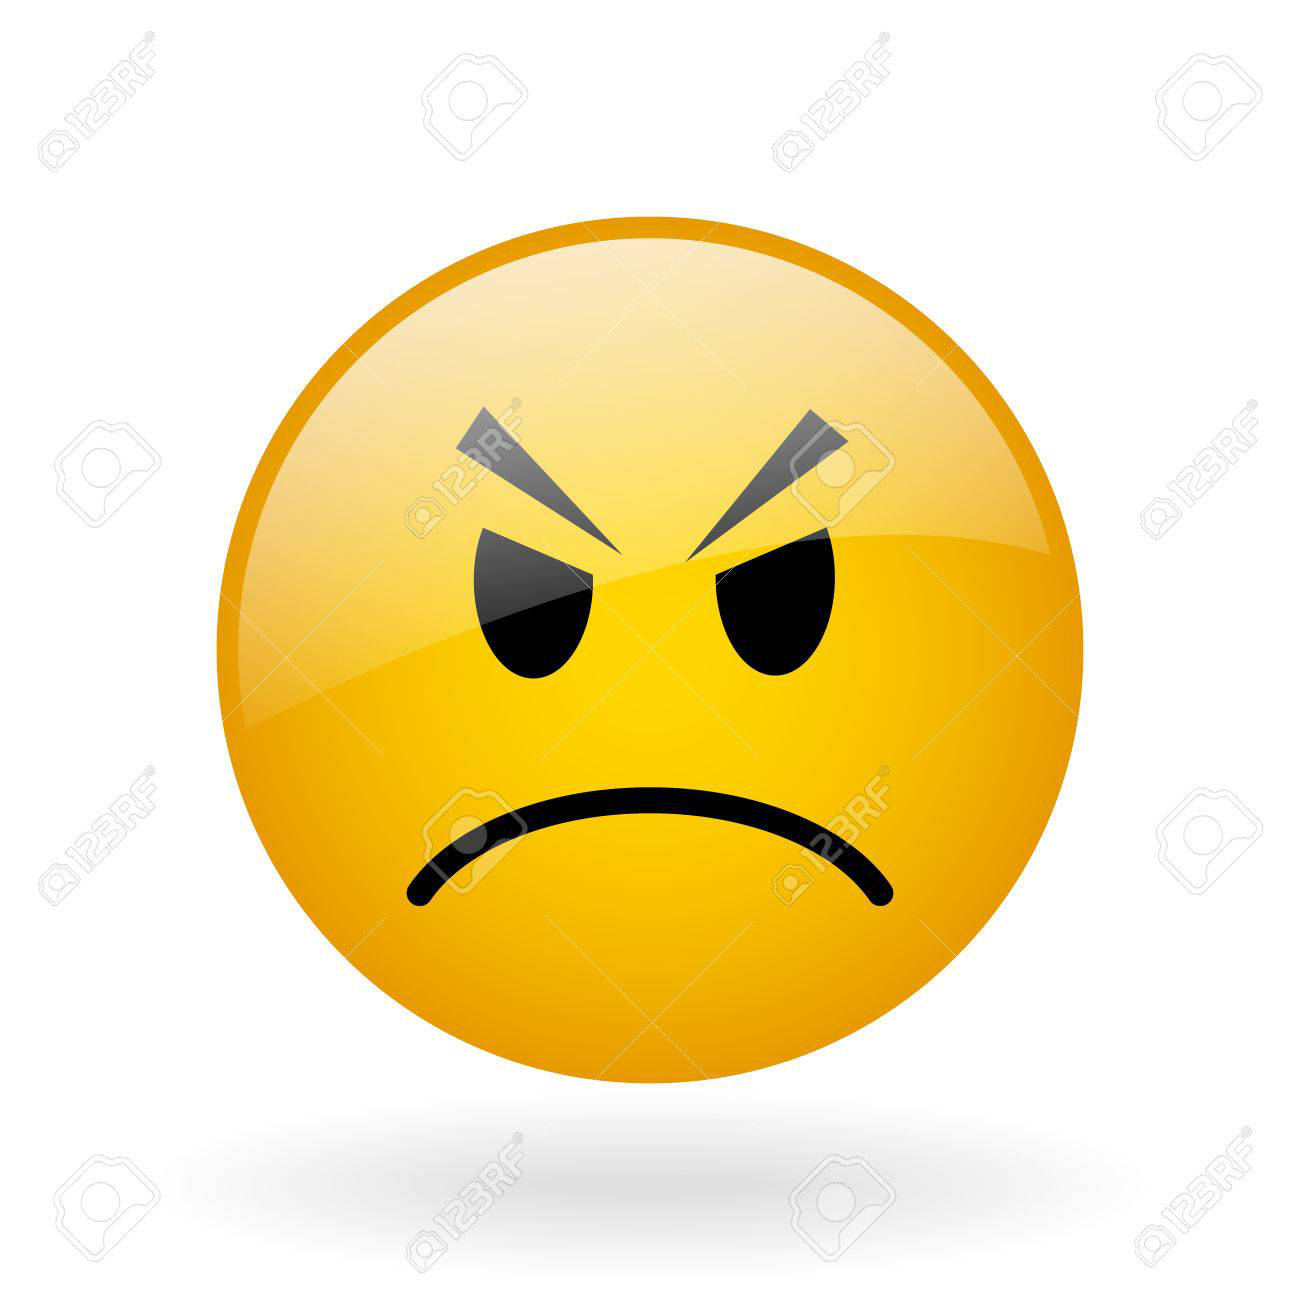

In [101]:
#cargar imagen
enojada = PIL.Image.open("D:/NLP/ProyectoNLP/enojada.jpg")
display(enojada)

In [103]:
#crear mascara : pasar imagen a números

mask=np.array(enojada)
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [104]:
palabras = data.Descripcion.str.cat(sep=' ')
 
wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='copper_r',
                     stopwords=stopwords,
                     mask=mask, contour_width=0.5, contour_color='yellow').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
wordcloud.to_file("enojada.jpg")
 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

TypeError: Cannot use .str.cat with values of inferred dtype 'mixed-integer'.